# W07 - Class Practice
## Feylin Christelia - 0706022310012

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Feylin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Data Understanding, Cleaning, Visualizations

In [523]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [525]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [526]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [527]:
# rename the Annual Income(k$) column and Spending Score (1-100)
df = df.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [528]:
df = df.drop(columns=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


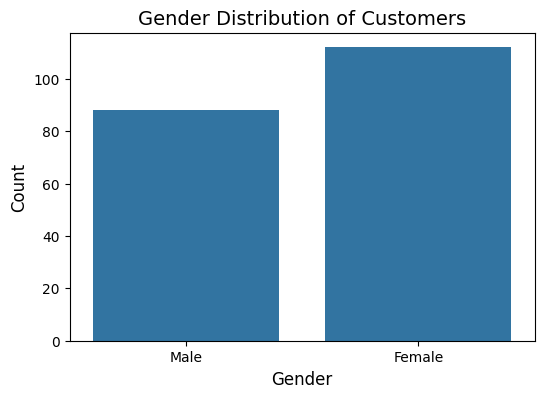

In [529]:
# Bar chart of customers' gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)

plt.title('Gender Distribution of Customers', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

Female customers are more than male customers in total

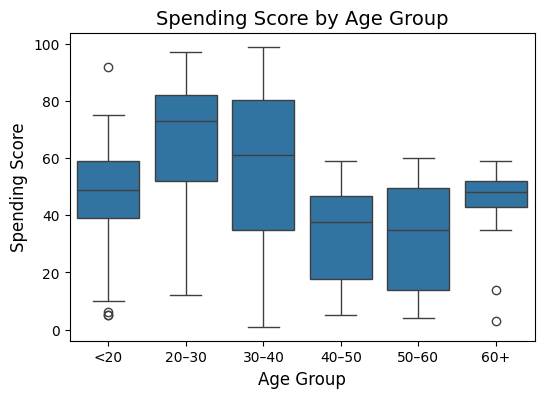

In [530]:
# Box plot of spending score by age group
df['Age Group'] = pd.cut(df['Age'],
                         bins=[0, 20, 30, 40, 50, 60, 70],
                         labels=['<20', '20–30', '30–40', '40–50', '50–60', '60+'])

plt.figure(figsize=(6,4))
sns.boxplot(x='Age Group', y='Spending Score', data=df)

plt.title('Spending Score by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.show()

Customers aged 20–40 years generally have higher and more varied spending scores, meaning they tend to spend more actively at the mall. Meanwhile, customers aged 40 and above show lower and more consistent spending, indicating more controlled or practical shopping habits. This suggests that younger adults are more impulsive or lifestyle-driven shoppers, while older customers are more conservative in their spending.

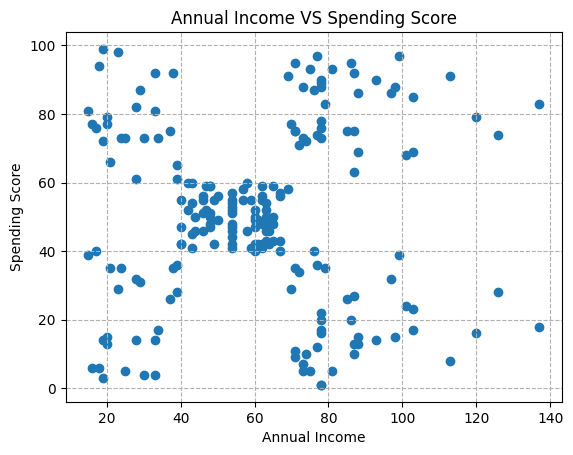

In [531]:
# Scatter plot of annual income vs spending score
plt.scatter(df['Annual Income'], df['Spending Score'])
plt.title('Annual Income VS Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

Most customers have annual incomes between 40–80k and spending scores between 40–60, forming a dense cluster in the center. There are also smaller groups in the top-right and bottom-right corners, customers with high income but very high or very low spending scores. This suggests clear differences in spending habits across income levels.

In [532]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender column
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [533]:
df = df.drop(columns=['Age Group'])
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [534]:
# create new dataframe that consist only annual income and spending score
df = df[['Annual Income', 'Spending Score']]
df.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Data Transformation

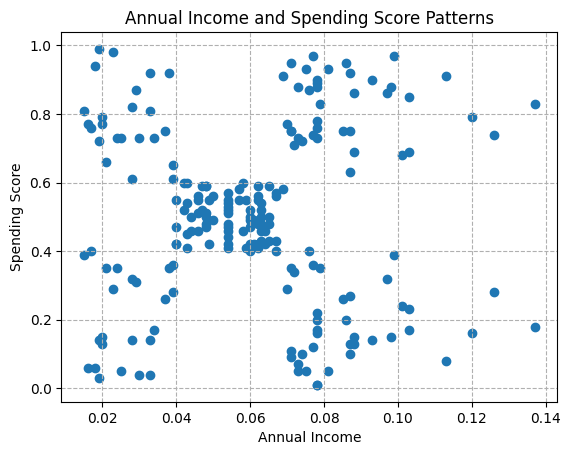

In [535]:
# scale dataset with decimal scaling
def decimal_scaling(df):
  normalized_df = df.copy()
  for column in df.columns:
    j = 0
    max_value = df[column].max()
    while max_value > 1:
      max_value /= 10
      j += 1
    normalized_df[column] = df[column] / (10 ** j)
  return normalized_df

# Example usage:
df_decimal_scaled = decimal_scaling(df)

df_decimal_scaled.head()

# visualization
plt.scatter(df_decimal_scaled["Annual Income"], df_decimal_scaled["Spending Score"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Annual Income and Spending Score Patterns")
plt.show()

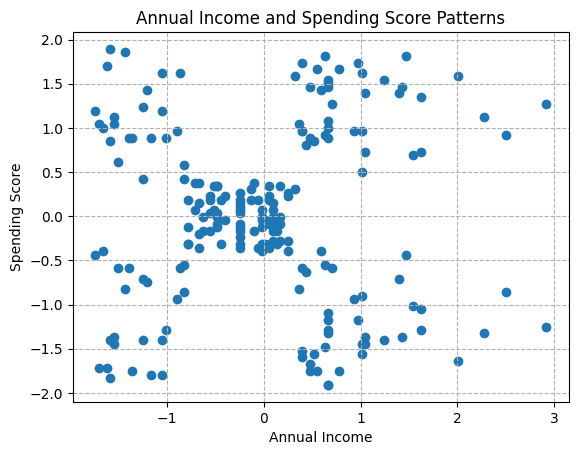

In [536]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Annual Income", "Spending Score"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Annual Income"], df_sc_scaled["Spending Score"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Annual Income and Spending Score Patterns")
plt.show()

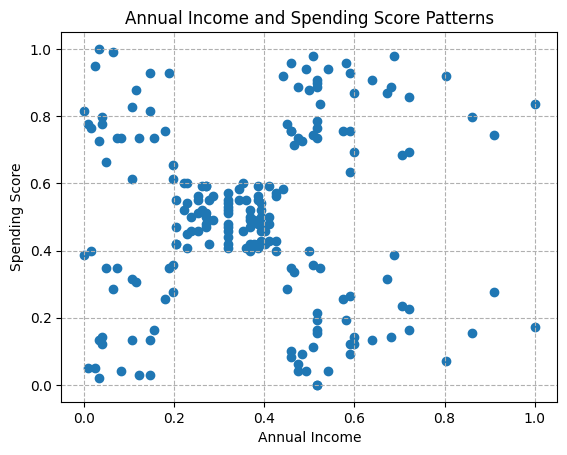

In [537]:
# scale dataset with Min Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["Annual Income", "Spending Score"])

df_minmax_scaled.head()

# visualization
plt.scatter(df_minmax_scaled["Annual Income"], df_minmax_scaled["Spending Score"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Annual Income and Spending Score Patterns")
plt.show()

Scaling was applied to ensure that annual income and spending score have equal influence in the clustering process, since K-Means relies on distance and is sensitive to differences in feature magnitude.

### Choosing K

In [538]:
from sklearn.cluster import KMeans

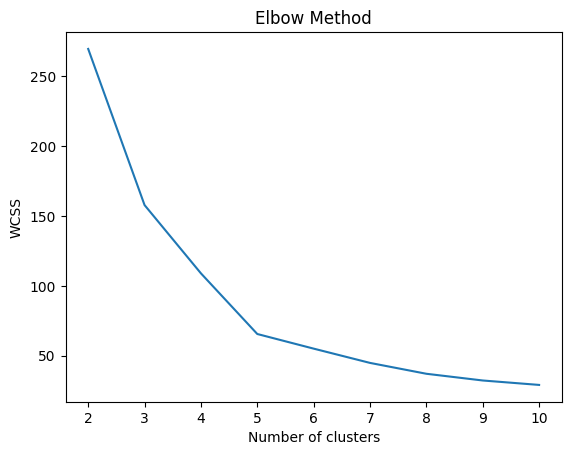

In [539]:
wcss = []
for i in range(2, 11):   #clusters 2-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [540]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  269.299343
1                   3  157.704008
2                   4  108.921317
3                   5   65.568408
4                   6   55.114226
5                   7   44.911186
6                   8   37.148117
7                   9   32.345838
8                  10   29.178990


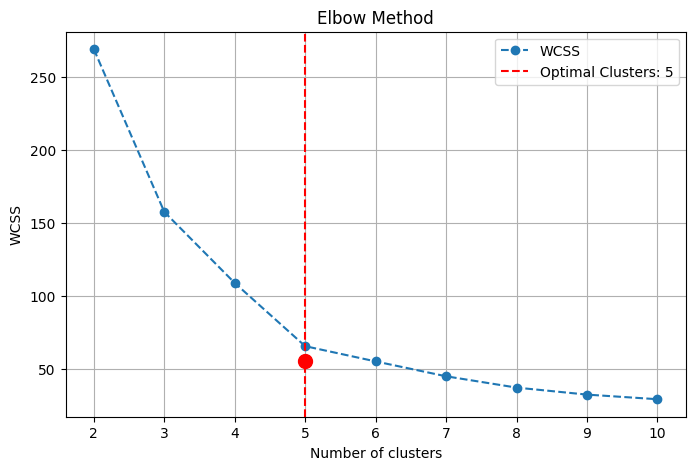

The optimal number of clusters is: 5


In [541]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

The Elbow Method shows that the optimal number of clusters is K = 5, as that’s where the WCSS curve starts to flatten, which means adding more clusters gives minimal improvement in explaining the variance.

Based on the Elbow Method analysis, the WCSS decreased sharply as the number of clusters (K) increased, but the rate of improvement began to slow noticeably after K = 5. This point formed a clear “elbow” in the WCSS curve, indicating that adding more clusters beyond five yields only minimal reductions in variance. Therefore, the optimal number of clusters for this dataset is K = 5, as it provides a good balance between simplicity and accuracy, effectively grouping customers with similar income and spending behavior into meaningful segments.

### Modeling with K-Means

In [542]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Annual Income,Spending Score,KMeans_Cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


C:\Users\Feylin\AppData\Local\Temp\ipykernel_30888\162968296.py:4: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Annual Income", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


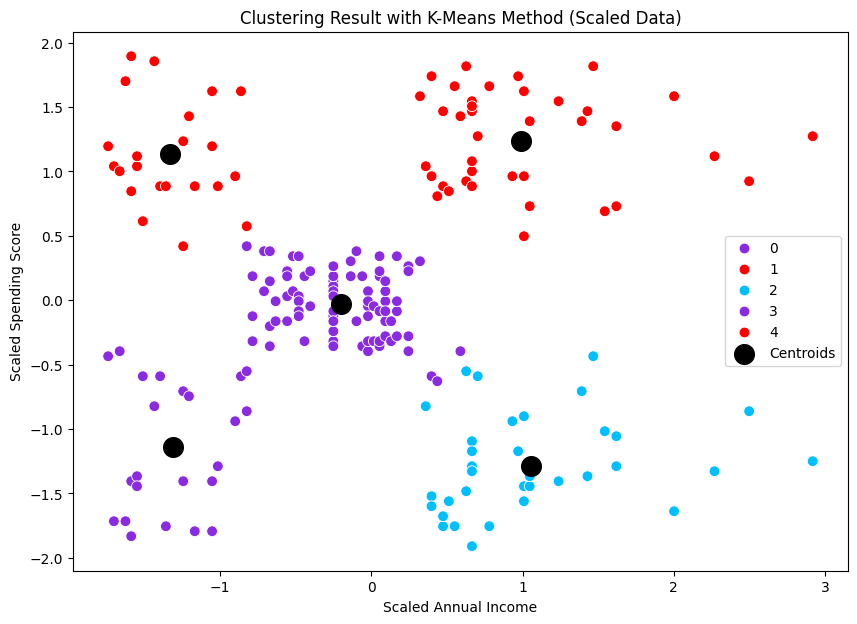

In [543]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Annual Income", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

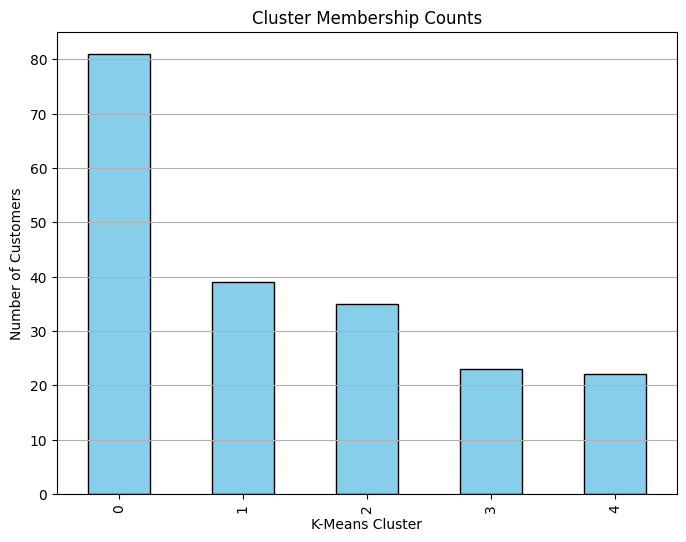

In [544]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [545]:
# reload the full dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df_full = pd.read_csv(url)

# add the cluster labels from the current df (based on annual income & spending score)
df_full['KMeans_Cluster'] = df['KMeans_Cluster']

# df_full has all columns + the cluster label
df_full.head()

# Group the data by cluster and calculate the mean, median, min-max of Age, Annual Income, Spending Score and the mode of Gender
cluster_summary = df_full.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'median', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'median', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'median', 'min', 'max'],
    'Gender': lambda x: x.mode()[0] 
})
cluster_summary

Age                Annual Income (k$)                  \
                     mean median min max               mean median min  max   
KMeans_Cluster                                                                
0               42.716049   46.0  18  70          55.296296   54.0  39   76   
1               32.692308   32.0  27  40          86.538462   79.0  69  137   
2               41.114286   42.0  19  59          88.200000   85.0  70  137   
3               45.217391   46.0  19  67          26.304348   25.0  15   39   
4               25.272727   23.5  18  35          25.727273   24.5  15   39   

               Spending Score (1-100)                  Gender  
                                 mean median min max <lambda>  
KMeans_Cluster                                                 
0                           49.518519   50.0  34  61   Female  
1                           82.128205   83.0  63  97   Female  
2                           17.114286   16.0   1  39     Male  
3                           20.913043   17.0   3  40   Female  
4                           79.363636   77.0  61  99   Female

**Cluster 0 Persona = Mid-Age, Moderate Income, Average Spending**

Persona:

*   Mid-aged customers (40s), mostly female.

*   Have moderate income and show average spending habits, not overly frugal but not extravagant either.

*   Likely working professionals or middle-income families who prioritize practicality and quality.

*   Shop occasionally and respond to value-for-money deals rather than luxury or impulse offers.

Managerial Implications:

*   Targeting: Focus on value-oriented mid-segment customers, they represent steady, repeat buyers who appreciate reliability and fair pricing.

*   Campaign Channels: Use email newsletters, loyalty program promotions, and Facebook/Instagram ads highlighting family-friendly or practical products.

*   Pricing/Offer Design: Offer bundle discounts, mid-tier loyalty tiers, and seasonal promotions (e.g., “Buy 2 Get 1” or “Holiday Specials”).

*   Retention Ideas: Encourage repeat purchases via reward points or cashback. Personalize recommendations based on previous purchases. Highlight product durability and quality assurance.

**Cluster 1 = Young, High Income, High Spending**

Persona:

*   Young adults (avg. 32 years), mostly female.

*   High annual income (~$86k) and high spending score (~82).

*   Likely affluent professionals or trend-driven shoppers.

Managerial Implications:

*   Targeting: Premium segment; focus on lifestyle and exclusivity.

*   Campaign Channels: Social media ads, influencer partnerships, and VIP events.

*   Pricing/Offers: Premium pricing with exclusive limited-time offers.

*   Retention Ideas: VIP loyalty program, early product access, or personalized recommendations.

**Cluster 2 = Middle-Aged, High Income, Low Spending**

Persona:

*   Around 41 years old, mostly male.

*   High income (~$88k) but low spending score (~17).

*   Represents wealthy but conservative buyers who spend selectively.

Managerial Implications:

*   Targeting: Potential but untapped premium customers.

*   Campaign Channels: Targeted email or personal sales outreach.

*   Pricing/Offers: Highlight long-term value, durability, or investment-worth products.

*   Retention Ideas: Build trust through premium after-sales support or quality guarantees.

**Cluster 3 = Older, Low Income, Low Spending**

Persona:

*   Older customers (avg. 45 years), mostly female.

*   Low income (~$26k) and low spending (~21).

*   Likely budget-conscious individuals or retirees.

Managerial Implications:

*   Targeting: Value shoppers focused on affordability.

*   Campaign Channels: Offline channels (brochures, SMS deals), community promotions.

*   Pricing/Offers: Frequent discounts, bundle deals, and loyalty savings.

*   Retention Ideas: Coupon-based programs and budget product lines.

**Cluster 4 = Young, Low Income, High Spending**

Persona:

*   Very young (avg. 25 years), mostly female.

*   Low income (~$25k) but high spending score (~79).

*   Likely students or young adults driven by trends and social influence.

Managerial Implications:

*   Targeting: Trendy, aspirational segment that values experience over savings.

*   Campaign Channels: Instagram, TikTok, online ads with vibrant visuals.

*   Pricing/Offers: Installment options, student discounts, and flash sales.

*   Retention Ideas: Gamified loyalty app or referral rewards for social sharing.